First guess at a, b  5.0 3.5
First loss function is  7.890933746255283
Best a,b is  1.2036993070662023 3.310473877247611
Best loss function is  2.690376323682816


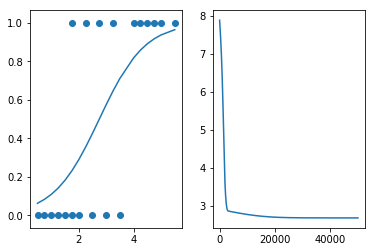

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
%matplotlib inline

# logistic regression is a classification algorithm, which does not 
# give out continuous values as the linear model does instead logistic
# regression will compute the probability of a observation and based 
# on that value, the observation will be mapped to a class as per a 
# given threshold.
# The function logistic() below is the sigmoid function, which will give 
# output values ranging from 0 to 1(probability)
# the sigmoid function s(z) = 1/ 1+(e^-z), where "z" is mx+b which is part 
# of model's equation and "e" is Euler's number i.e 2.718281 
# Types of logistic regression : 1.Binary (Pass/Fail)
#                                2.Multi (Cats, Dogs, Sheep)
#                                3.Ordinal (Low, Medium, High)
# sigmoid function which we are using is a binary type, the plot od sigmoid
# curve shows how the output isassigned to 0 for -ve number and 1 for 
# positive number.


def logistic(x,a,b):
    return 1/(1.0+np.exp(-a*x+b))

# loss function takes in 4 arguments, of x, y_obs which are arrays of 20 
# elements each and a and b are defined below as random number to initiate 
# the process.
# the loss is computed by actual y_obs and y_predicted values, 
# the formula to compute loss is same as that for linear regression.
# which is sum of squared distances between predicted to actual value.
def loss(x,y_obs,a,b):
    y_model = logistic(x,a,b)
    return np.sum( (y_model-y_obs)**2 )

# x and y_obs are created, using numpy array and these will be used later for 
# plotting the observation in scatter plot
# y_obs are all divided among the value 1 and 0 for each set of 10 
# observations. 
# This is purposely done here since we are not specifying
# any classes or threshold to which the observation will be assigned or 
# divided among. 
x = np.array( [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,
               3.50,4.00,4.25,4.50,4.75,5.00,5.50] )
y_obs = np.array( [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1] )

# for now random values for a and b are chosen.
a,b = 5.0,3.5
y_model = logistic(x,a,b) # array of probabilities from 1 to 0 for 
# all 20 observation

# printing out the values of the four arguments before starting 
# the iteration to compare them with the end result after iteration. 
# loss should be reduced at the end of iteration, with the learning 
# and changing values of a and b per iteration.
print('First guess at a, b ',a,b)
print('First loss function is ',loss(x,y_obs,a,b))

# grad function takes in the function which produce scalar value. 
# In this case loss produces scalar value as output.
# d_by_da gives derivative of loss with respect to slope i.e "a" 
# which is the 3rd argument in loss function(2nd position)
# d_by_db gives derivative of y-intercept with respect to slope 
# i.e "b" which is the 
# 4th argument in loss function(3nd position)
d_by_da = grad(loss,2) 
d_by_db = grad(loss,3) 
# d(loss)/d(a) loss is differentiated with respect to "a"
# d(loss)/d(b) loss is differentiated with respect to "b"


# learning rate is the steps by which "a" and "b" are being updated 
# till the loss is minimum.
learning_rate = 0.001
maximum_number_of_iterations = 50000
ssr = []

# loop will run for 50,000 times, by the time which "a" and "b" values 
# will be updated to the point where loss will be minimum.
# ssr/loss array will have 50000 values at the end of the iteration
for iter in range(maximum_number_of_iterations): 
    a -= learning_rate*d_by_da(x,y_obs,a,b)
    b -= learning_rate*d_by_db(x,y_obs,a,b)              
    y_model = logistic(x,a,b)
    ssr.append(loss(x,y_obs,a,b))

# final a,b and loss value are displayed
print('Best a,b is ',a,b)
print('Best loss function is ',loss(x,y_obs,a,b))

# The sigmoid plot (curve) for x and y_model is accurately starting 
# from 0 and ending to 1 and is capturing the obseravtion occurdingly. 
# the loss/ssr plot shows that initial loss was high but by 1000th 
# iteration the loss started to gradually reduce. Which shows that our
# model is fits well
plt.subplot(1,2,1)
plt.scatter(x,y_obs)
plt.plot(x,y_model)

plt.subplot(1,2,2)
plt.plot(ssr)

plt.show()

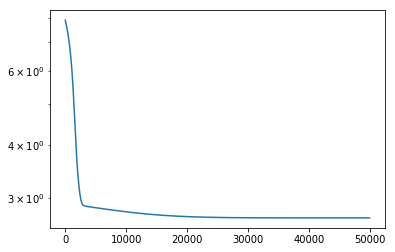

In [3]:
# semilogy is just a thin wrapper around plot which additionally changes 
# the y-axis to log scaling  and a linear scale for the x-axis. 
#It plots the columns of Y versus their index
plt.semilogy(ssr)

In [2]:
x = np.array( [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
               2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50] )
y_obs = np.array( [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1] )

# for now random values for a and b are chosen.
a,b = 5.0,3.5
def logistic(x,a,b):
    return 1/(1.0+np.exp(-a*x+b))
y_model = logistic(x,a,b)
y_model # y_model is an array which has the probability values 
# which is ranging from 0 and 1.

array([0.26894142, 0.5621765 , 0.81757448, 0.93991335, 0.98201379,
       0.99477987, 0.99477987, 0.99849882, 0.99956944, 0.99987661,
       0.99996464, 0.99998987, 0.9999971 , 0.99999917, 0.99999993,
       0.99999998, 0.99999999, 1.        , 1.        , 1.        ])

In [10]:
def loss(x,y_obs,a,b):
    y_model = logistic(x,a,b)
    return np.sum( (y_model-y_obs)**2 )

In [11]:
loss(x,y_obs,a,b) # scalar value output.

3.709244592836294

reference link:

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://www.youtube.com/watch?v=yIYKR4sgzI8&t=57s